# Taller 1


## Parte 1

#### 1. Modelo de Pytorch 

In [3]:
#Importamos las librerias necesarias 
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# traemos el dataset
df = pd.read_csv('auto-mpg.data',
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )


In [6]:
#limpiamos los datos 
df.isna().sum()
df.dropna(inplace=True)
df=df.reset_index(drop=True)
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [10]:
# Variable de entrada (X) y salida (y)
X = df[['Horsepower']].values.astype(np.float32)
y = df[['MPG']].values.astype(np.float32)

# Normalizar (facilita el entrenamiento) 
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_norm = scaler_X.fit_transform(X)
y_norm = scaler_y.fit_transform(y)


In [11]:
#se divide en el enteenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Convertir a tensores
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)


In [12]:
#Se defien el modelo lineal 

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)  # 1 entrada, 1 salida

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()


In [13]:
# Funcion de perdida


criterion = nn.MSELoss()

#Optimizador 

optimizer = optim.SGD(model.parameters(), lr=0.01)


In [14]:
#Entrenamiento
epochs = 100
loss_history = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 1.0403
Epoch [20/100], Loss: 0.8284
Epoch [30/100], Loss: 0.6869
Epoch [40/100], Loss: 0.5925
Epoch [50/100], Loss: 0.5294
Epoch [60/100], Loss: 0.4873
Epoch [70/100], Loss: 0.4592
Epoch [80/100], Loss: 0.4405
Epoch [90/100], Loss: 0.4280
Epoch [100/100], Loss: 0.4196


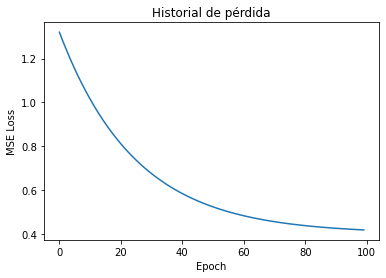

In [15]:
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Historial de pérdida')
plt.show()


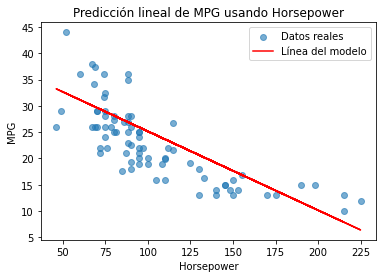

In [16]:

#comparamos proyectado vs real


model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).numpy()

# Volver a escala original
X_test_orig = scaler_X.inverse_transform(X_test)
y_test_orig = scaler_y.inverse_transform(y_test)
y_pred_orig = scaler_y.inverse_transform(y_pred)

plt.scatter(X_test_orig, y_test_orig, label='Datos reales', alpha=0.6)
plt.plot(X_test_orig, y_pred_orig, color='red', label='Línea del modelo')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Predicción lineal de MPG usando Horsepower')
plt.legend()
plt.show()


###  2. Evaluar el modelo base


In [17]:
# Se utiliza MSE y MAE 

from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predicciones
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor).numpy()
    y_test_true = y_test_tensor.numpy()

# Métricas en escala normalizada
mse = mean_squared_error(y_test_true, y_pred_test)
mae = mean_absolute_error(y_test_true, y_pred_test)

print(f'MSE (modelo base): {mse:.4f}')
print(f'MAE (modelo base): {mae:.4f}')


MSE (modelo base): 0.3906
MAE (modelo base): 0.5235


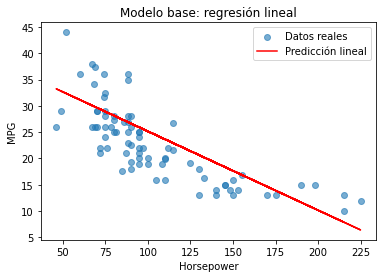

In [18]:
X_test_orig = scaler_X.inverse_transform(X_test)
y_test_orig = scaler_y.inverse_transform(y_test)
y_pred_orig = scaler_y.inverse_transform(y_pred_test)

plt.scatter(X_test_orig, y_test_orig, label='Datos reales', alpha=0.6)
plt.plot(X_test_orig, y_pred_orig, color='red', label='Predicción lineal')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Modelo base: regresión lineal')
plt.legend()
plt.show()


El modelo lineal base, que utiliza únicamente la variable Horsepower como predictor del consumo de gasolina (MPG), obtuvo un error cuadrático medio (MSE) de 0.3906 y un error absoluto medio (MAE) de 0.5235 en los datos de prueba (normalizados).

Estos valores indican que el modelo logra capturar parte de la relación entre las variables, pero su capacidad predictiva es limitada. Visualmente, se observa que el modelo aprende una relación lineal decreciente entre Horsepower y MPG, lo cual es coherente con la intuición (mayor potencia suele implicar mayor consumo).

### 3. Función de activación no lineal

In [20]:
# creamos el nuevo modelo
class NonLinearModel(nn.Module):
    def __init__(self):
        super(NonLinearModel, self).__init__()
        self.fc1 = nn.Linear(1, 10)   # capa oculta
        self.act = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)   # salida

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        return x

nonlinear_model = NonLinearModel()



In [21]:
# entrenamiento modelo no lineal 
criterion = nn.MSELoss()
optimizer = optim.SGD(nonlinear_model.parameters(), lr=0.01)

loss_history_nl = []
epochs = 100

for epoch in range(epochs):
    nonlinear_model.train()
    optimizer.zero_grad()

    outputs = nonlinear_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    loss_history_nl.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'[ReLU] Epoch {epoch+1}, Loss: {loss.item():.4f}')


[ReLU] Epoch 10, Loss: 0.6742
[ReLU] Epoch 20, Loss: 0.6105
[ReLU] Epoch 30, Loss: 0.5657
[ReLU] Epoch 40, Loss: 0.5334
[ReLU] Epoch 50, Loss: 0.5096
[ReLU] Epoch 60, Loss: 0.4913
[ReLU] Epoch 70, Loss: 0.4767
[ReLU] Epoch 80, Loss: 0.4646
[ReLU] Epoch 90, Loss: 0.4542
[ReLU] Epoch 100, Loss: 0.4449


MSE (modelo ReLU): 0.3934
MAE (modelo ReLU): 0.5142


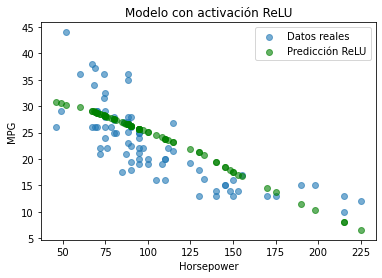

In [22]:
with torch.no_grad():
    y_pred_nl = nonlinear_model(X_test_tensor).numpy()

mse_nl = mean_squared_error(y_test_true, y_pred_nl)
mae_nl = mean_absolute_error(y_test_true, y_pred_nl)

print(f'MSE (modelo ReLU): {mse_nl:.4f}')
print(f'MAE (modelo ReLU): {mae_nl:.4f}')

# Se grafica
y_pred_nl_orig = scaler_y.inverse_transform(y_pred_nl)

plt.scatter(X_test_orig, y_test_orig, label='Datos reales', alpha=0.6)
plt.scatter(X_test_orig, y_pred_nl_orig, color='green', label='Predicción ReLU', alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Modelo con activación ReLU')
plt.legend()
plt.show()


Cambiando a la función de activación no lineal (ReLU) en una capa oculta del modelo, se esperaria una mejora en la capacidad del modelo para capturar relaciones no lineales entre Horsepower y MPG. Sin embargo, los resultados muestran un MSE de 0.3934 y un MAE de 0.5142, que son muy similares a los obtenidos con el modelo lineal base.

Aunque el MAE se redujo un poco, el MSE aumentó también, lo cual sugiere que el modelo no lineal no logró una mejora significativa en el ajuste global. Esto puede deberse a que la arquitectura con solo una capa oculta y 10 neuronas no fue suficiente para capturar patrones más complejos o que la relación entre las variables sigue siendo predominantemente lineal

### 4. Modelo con dos capas ocultas

In [23]:
class DeepModel(nn.Module):
    def __init__(self):
        super(DeepModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 1)
        )

    def forward(self, x):
        return self.net(x)

deep_model = DeepModel()


In [24]:
# entrenamiento del modelo

criterion = nn.MSELoss()
optimizer = optim.SGD(deep_model.parameters(), lr=0.01)

loss_history_deep = []

for epoch in range(epochs):
    deep_model.train()
    optimizer.zero_grad()

    outputs = deep_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    loss_history_deep.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'[Deep] Epoch {epoch+1}, Loss: {loss.item():.4f}')


[Deep] Epoch 10, Loss: 0.7316
[Deep] Epoch 20, Loss: 0.6500
[Deep] Epoch 30, Loss: 0.5866
[Deep] Epoch 40, Loss: 0.5340
[Deep] Epoch 50, Loss: 0.4894
[Deep] Epoch 60, Loss: 0.4526
[Deep] Epoch 70, Loss: 0.4234
[Deep] Epoch 80, Loss: 0.4012
[Deep] Epoch 90, Loss: 0.3853
[Deep] Epoch 100, Loss: 0.3742


MSE (modelo profundo): 0.3287
MAE (modelo profundo): 0.4521


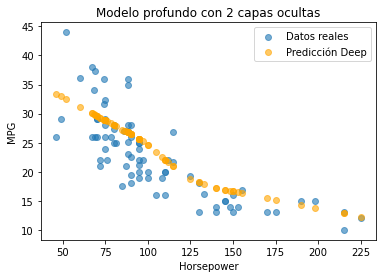

In [25]:
# Se evalua 

with torch.no_grad():
    y_pred_deep = deep_model(X_test_tensor).numpy()

mse_deep = mean_squared_error(y_test_true, y_pred_deep)
mae_deep = mean_absolute_error(y_test_true, y_pred_deep)

print(f'MSE (modelo profundo): {mse_deep:.4f}')
print(f'MAE (modelo profundo): {mae_deep:.4f}')

# a nivel visual
y_pred_deep_orig = scaler_y.inverse_transform(y_pred_deep)

plt.scatter(X_test_orig, y_test_orig, label='Datos reales', alpha=0.6)
plt.scatter(X_test_orig, y_pred_deep_orig, color='orange', label='Predicción Deep', alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Modelo profundo con 2 capas ocultas')
plt.legend()
plt.show()


El modelo que es más profundo, el cual incluye dos capas ocultas con funciones de activación ReLU, presenta una mejora significativa en respecto a los modelos anteriores. Se obtuvo un MSE de 0.3287 y un MAE de 0.4521, lo cual representa una reducción significativa en ambos errores frente al modelo lineal base (MSE: 0.3906, MAE: 0.5235).

Esto indica que el modelo profundo fue capaz de capturar mejor las complejidades y posibles no linealidades en la relación entre Horsepower y MPG. Además, comparando las tres graficas es posible evidenciar que este modelo se ajusta más a los datos reales, sin limitarse a una función lineal simple.

## Parte 2: Clasificación con redes neuronales
### 1. Clasificación en pytorch

In [37]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


df_heart = pd.read_csv('heart.csv')

# Codificar variables categóricas con one-hot encoding
df_heart_clean = pd.get_dummies(df_heart, drop_first=True)

# Separar variables predictoras (X) y objetivo (y)
X = df_heart_clean.drop(columns=['target']).values.astype(np.float32)
y = df_heart_clean['target'].values.astype(np.float32).reshape(-1, 1)

#  Normalizar X (no y, porque es 0/1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir entre entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#  Convertir a tensores de PyTorch
X_train_tensor = torch.from_numpy(X_train)
y_train_tensor = torch.from_numpy(y_train)
X_test_tensor = torch.from_numpy(X_test)
y_test_tensor = torch.from_numpy(y_test)


print(f'X_train shape: {X_train_tensor.shape}')
print(f'y_train shape: {y_train_tensor.shape}')
s


X_train shape: torch.Size([242, 16])
y_train shape: torch.Size([242, 1])


In [38]:
## modelo de clasificación 

import torch.nn as nn

class HeartModel(nn.Module):
    def __init__(self):
        super(HeartModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X.shape[1], 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model_heart = HeartModel()


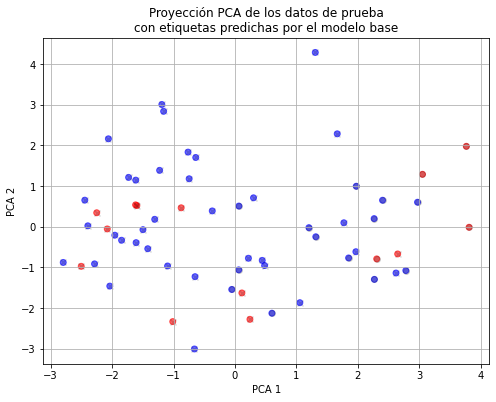

In [39]:
from sklearn.decomposition import PCA

# Aplicamos PCA para proyectar los datos en 2 dimensiones
pca = PCA(n_components=2)
X_test_2d = pca.fit_transform(X_test)

# Obtener predicciones
with torch.no_grad():
    y_pred_probs = model_heart(X_test_tensor)
    y_pred_labels = (y_pred_probs >= 0.5).float().numpy().flatten()

# Colores para clases predichas
colors = ['red' if pred == 1 else 'blue' for pred in y_pred_labels]

# Graficamos los datos proyectados en 2D según la clase predicha
plt.figure(figsize=(8, 6))
plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=colors, alpha=0.6, label='Predicciones')

# Añadimos los verdaderos positivos (verde) y negativos (gris) como fondo
y_test_np = y_test_tensor.numpy().flatten()
for i in range(len(y_test_np)):
    marker = 'o' if y_test_np[i] == 1 else 'x'
    plt.scatter(X_test_2d[i, 0], X_test_2d[i, 1], marker=marker, color='black', alpha=0.15)

plt.title('Proyección PCA de los datos de prueba\ncon etiquetas predichas por el modelo base')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()


### 2. Entrenamiento del modelo

In [40]:
import torch.optim as optim

criterion = nn.BCELoss()  # Para clasificación binaria
optimizer = optim.Adam(model_heart.parameters(), lr=0.01)

epochs = 100
loss_history = []

for epoch in range(epochs):
    model_heart.train()
    optimizer.zero_grad()
    outputs = model_heart(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item():.4f}')


Epoch 10, Loss: 0.4303
Epoch 20, Loss: 0.3116
Epoch 30, Loss: 0.2697
Epoch 40, Loss: 0.2471
Epoch 50, Loss: 0.2283
Epoch 60, Loss: 0.2107
Epoch 70, Loss: 0.1938
Epoch 80, Loss: 0.1777
Epoch 90, Loss: 0.1610
Epoch 100, Loss: 0.1442


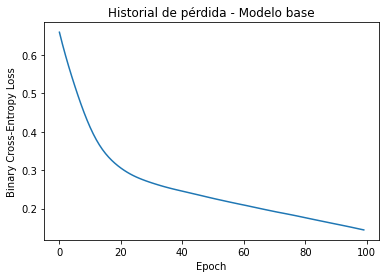

In [41]:
import matplotlib.pyplot as plt

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Historial de pérdida - Modelo base')
plt.show()


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_heart.eval()
with torch.no_grad():
    y_pred = model_heart(X_test_tensor)
    y_pred_label = (y_pred >= 0.5).float()

# Convertir a numpy para métricas
y_test_np = y_test_tensor.numpy()
y_pred_np = y_pred_label.numpy()

print("Accuracy:", accuracy_score(y_test_np, y_pred_np))
print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred_np))
print("Classification Report:\n", classification_report(y_test_np, y_pred_np))


Accuracy: 0.7868852459016393
Confusion Matrix:
 [[37  7]
 [ 6 11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85        44
         1.0       0.61      0.65      0.63        17

    accuracy                           0.79        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.79      0.79      0.79        61



El modelo base alcanzó una exactitud del 78.7%, con buen desempeño en la clase 0 (sin enfermedad), pero menor capacidad para detectar la clase 1 (con enfermedad), con una precisión del 61% y recall del 65%. Esto indica que el modelo identifica bien a los pacientes sanos, pero falla en algunos casos de enfermedad. Se requiere ajustar la arquitectura para mejorar la detección de positivos, clave en aplicaciones médicas.

### 3. Cambio en el número de neuronas (2 versiones)

In [43]:
## Modelo utilizando más neuronas
# Modelo con más neuronas
class MoreNeurons(nn.Module):
    def __init__(self):
        super(MoreNeurons, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X.shape[1], 64),  # más neuronas
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )


In [44]:
## modelo utilizando menos neuronas
# Modelo con menos neuronas
class FewerNeurons(nn.Module):
    def __init__(self):
        super(FewerNeurons, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X.shape[1], 4),  # menos neuronas
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )


### 4. Cambiar el número de capas

In [45]:
# Modelo más profundo
class DeeperModel(nn.Module):
    def __init__(self):
        super(DeeperModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X.shape[1], 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )


### 5. Cambiando la función de activación

In [46]:
# Usando Tanh
class TanhModel(nn.Module):
    def __init__(self):
        super(TanhModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X.shape[1], 16),
            nn.Tanh(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )


In [47]:
# Usando LeakyReLU
class LeakyModel(nn.Module):
    def __init__(self):
        super(LeakyModel, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(X.shape[1], 16),
            nn.LeakyReLU(0.01),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

        